In [92]:
# Import the necessary libraries
from textblob import TextBlob
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
df = pd.read_csv('businessdaynews.csv')
df.head()

,Title,Author,Date,Excerpt
0,"Ganduje leads APC's NWC to Buhari, says move t...",Adeola Ajakaiye,"Apr 12, 2025","Abdullah Ganduje, national chairman of the rul..."
1,US tightens visa interview rules for Nigerian ...,Ojochenemi Onje,"Apr 12, 2025",The United States Mission in Nigeria has annou...
2,Former Super Eagles coach Christian Chukwu die...,Anthony Nlebem,"Apr 12, 2025","Former Super Eagles coach and captain, Christi..."
3,"Economic, humanitarian strain deepen in Platea...",Nathaniel Gbaoron,"Apr 12, 2025",The wave of renewed terror attacks sweeping ac...
4,Nigeria risks missing out on the Trump tariff ...,Oluwole Crowther,"Apr 12, 2025",After all has been said and done about how Afr...


In [42]:
df.shape

(7760, 4)

In [47]:
df.value_counts()

Title                                                                                   Author                Date          Excerpt                                                                                                                                             
‘World’s most opaque company’ stench trails NNPC secret deals                           Oladehinde Oladipo    Jul 16, 2024  The non-publication of financial accounts and refusal to disclose contracts signed with oil companies may be justifying public sentiments that...       1
"Reckless, unconstitutional", Obi condemns Rivers' emergency rule, asks NASS to resist  Taofeek Oyedokun      Mar 19, 2025  Peter Obi, the presidential candidate of the Labour Party in the last general elections, has strongly condemned President Bola Tinubu’s...              1
#EndSARS to cost Nigerian insurers N20bn                                                Modestus Anaesoronye  Jun 30, 2021  The looting and vandalism that followed the #En

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    7760 non-null   object
 1   Author   1358 non-null   object
 2   Date     7760 non-null   object
 3   Excerpt  7760 non-null   object
dtypes: object(4)
memory usage: 242.6+ KB


In [49]:
df.isna().sum()

Title         0
Author     6402
Date          0
Excerpt       0
dtype: int64

In [ ]:
# Create a new column for Cleaned Excerpt and convert the texts to lowercase
df['Cleaned_Excerpt'] = df['Excerpt'].str.lower()

In [59]:
# Remove punctuations
punc = string.punctuation
df['Cleaned_Excerpt'] = df['Cleaned_Excerpt'].replace("[{}]".format(punc), '', regex=True)

In [64]:
# Tokenize the text
df['Excerpt_tokens'] = df['Cleaned_Excerpt'].apply(word_tokenize)

In [69]:
# Remove the stopwords
stop_words = set(stopwords.words('english'))
df['Excerpt_tokens'] = df['Excerpt_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [71]:
# Lemmatize the words
lemmatizer = WordNetLemmatizer()
df['Excerpt_tokens'] = df['Excerpt_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [72]:
df.head()

,Title,Author,Date,Excerpt,Cleaned_Excerpt,Excerpt_tokens
0,"Ganduje leads APC's NWC to Buhari, says move t...",Adeola Ajakaiye,"Apr 12, 2025","Abdullah Ganduje, national chairman of the rul...",abdullah ganduje national chairman of the ruli...,"[abdullah, ganduje, national, chairman, ruling..."
1,US tightens visa interview rules for Nigerian ...,Ojochenemi Onje,"Apr 12, 2025",The United States Mission in Nigeria has annou...,the united states mission in nigeria has annou...,"[united, state, mission, nigeria, announced, n..."
2,Former Super Eagles coach Christian Chukwu die...,Anthony Nlebem,"Apr 12, 2025","Former Super Eagles coach and captain, Christi...",former super eagles coach and captain christia...,"[former, super, eagle, coach, captain, christi..."
3,"Economic, humanitarian strain deepen in Platea...",Nathaniel Gbaoron,"Apr 12, 2025",The wave of renewed terror attacks sweeping ac...,the wave of renewed terror attacks sweeping ac...,"[wave, renewed, terror, attack, sweeping, acro..."
4,Nigeria risks missing out on the Trump tariff ...,Oluwole Crowther,"Apr 12, 2025",After all has been said and done about how Afr...,after all has been said and done about how afr...,"[said, done, african, country, capitalise, tru..."


In [75]:
# Apply TextBlob for sentiment analysis
df['Blob'] = df['Excerpt'].apply(TextBlob)
df['Polarity'] = df['Blob'].apply(lambda x: x.sentiment.polarity)
df['Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [76]:
df.head()

,Title,Author,Date,Excerpt,Cleaned_Excerpt,Excerpt_tokens,Blob,Polarity,Sentiment
0,"Ganduje leads APC's NWC to Buhari, says move t...",Adeola Ajakaiye,"Apr 12, 2025","Abdullah Ganduje, national chairman of the rul...",abdullah ganduje national chairman of the ruli...,"[abdullah, ganduje, national, chairman, ruling...","(A, b, d, u, l, l, a, h, , G, a, n, d, u, j, ...",0.000000,neutral
1,US tightens visa interview rules for Nigerian ...,Ojochenemi Onje,"Apr 12, 2025",The United States Mission in Nigeria has annou...,the united states mission in nigeria has annou...,"[united, state, mission, nigeria, announced, n...","(T, h, e, , U, n, i, t, e, d, , S, t, a, t, ...",0.136364,positive
2,Former Super Eagles coach Christian Chukwu die...,Anthony Nlebem,"Apr 12, 2025","Former Super Eagles coach and captain, Christi...",former super eagles coach and captain christia...,"[former, super, eagle, coach, captain, christi...","(F, o, r, m, e, r, , S, u, p, e, r, , E, a, ...",0.083333,positive
3,"Economic, humanitarian strain deepen in Platea...",Nathaniel Gbaoron,"Apr 12, 2025",The wave of renewed terror attacks sweeping ac...,the wave of renewed terror attacks sweeping ac...,"[wave, renewed, terror, attack, sweeping, acro...","(T, h, e, , w, a, v, e, , o, f, , r, e, n, ...",0.166667,positive
4,Nigeria risks missing out on the Trump tariff ...,Oluwole Crowther,"Apr 12, 2025",After all has been said and done about how Afr...,after all has been said and done about how afr...,"[said, done, african, country, capitalise, tru...","(A, f, t, e, r, , a, l, l, , h, a, s, , b, ...",0.000000,neutral


### Sentiment Distribution

In [ ]:

df['Sentiment'].value_counts()

Sentiment
positive    3038
neutral     3007
negative    1715
Name: count, dtype: int64

### Pie Chart Visualization for Sentiment Analysis

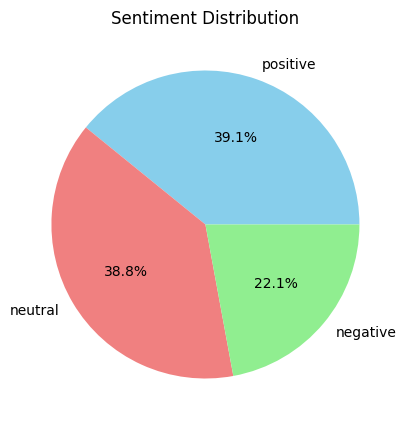

In [91]:
# Visualize the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Sentiment Distribution')
plt.savefig('sentiment_distribution.png')
plt.show()


#### Word Cloud Visualization for Sentiment Analysis


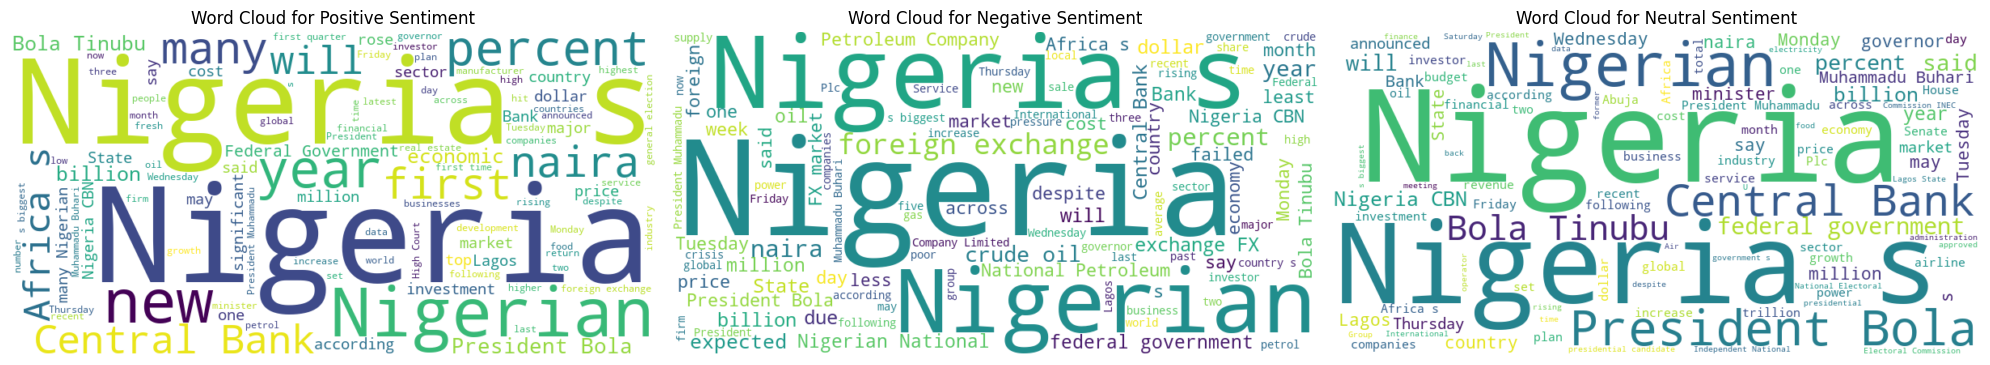

In [ ]:
# Create a figure for the word clouds
plt.figure(figsize=(20, 6))  

sentiments = ['positive', 'negative', 'neutral']
for i, sentiment in enumerate(sentiments):
    # Filter text by sentiment 
    text = ''.join(df[df['Sentiment'] == sentiment]['Excerpt'])
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        contour_width=3,
        contour_color='steelblue', 
        colormap='viridis'
    ).generate(text)
    
    # To create subplot in the current figure
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.axis('off')

# Apply tight layout and display the figure    
plt.tight_layout()
plt.savefig('wordclouds.png', dpi=300) 
plt.show()